## 한국일보 RSS 사회면 기사를 수집하여 명사만 추출하기

  - URL: http://rss.hankooki.com/의 사회면
    - http://rss.hankooki.com/daily/dh_society.xml

### Get article link From RSS

In [1]:
import requests
from bs4 import BeautifulSoup

import re

In [2]:
rss_url = 'http://rss.hankooki.com/daily/dh_society.xml'

rss_content = requests.get(rss_url).content
rss_soup = BeautifulSoup(rss_content, 'xml')

In [3]:
article_dic = {}

for article in range(20):
    titles = rss_soup.select('item > title')
    links = rss_soup.select('item > link')

article_dic['title'] = [title.text for title in titles]
article_dic['link'] = [link.text for link in links]

### Using requests and BeautifulSoup

In [4]:
article_list = []

for link in article_dic['link']:
    article_url = link

    article_content = requests.get(article_url).content
    article_soup = BeautifulSoup(article_content, 'html.parser', from_encoding='UTF-8')
    
    article = article_soup.select_one('#GS_Content').text
    article = article.strip()
    article = re.sub('(\[|\])', '', article)
    article = re.sub('(［|］)', '', article)
    article = re.sub('(\n|\t)', '', article)
    article = re.sub('기자' , '', article)
    
    article_list.append(article)

### Komoran을 사용한 명사 추출

In [5]:
from konlpy.tag import Komoran

In [6]:
# nouns의 변수에 알맞는 형태로 만들기 위해 list형의 데이터를 string형으로 만듦
article_string = ''
for article in article_list:
    article_string += article

komoran = Komoran()

article_nouns = [word for word in komoran.nouns(article_string) if len(word) > 1]
article_nouns = set(article_nouns)

C:\Users\Hyeonju\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [7]:
article_nouns

{'조감도',
 '구장',
 '이유',
 '비소',
 '안전',
 '조도',
 '영남',
 '호우',
 '이사장',
 '기간',
 '침묵',
 '공평',
 '참여',
 '광역버스',
 '대피',
 '고객',
 '귀경',
 '표현',
 '동안',
 '8월 19일',
 '시상금',
 '개발',
 '기업',
 '결단',
 '남녀노소',
 '하반기',
 '차이',
 '김순',
 '만큼',
 '시범',
 '모집',
 '태호',
 '이목구비',
 '진행',
 '자원',
 '고등',
 '발생',
 '위기',
 '불확실성',
 '쾌지나 칭칭나네',
 '처우',
 '더불어민주당',
 '운동',
 '시설',
 '스위트룸',
 '순환',
 '그라운드',
 '안심',
 '근로',
 '장애인',
 '유형',
 '패러다임',
 '긍정',
 '네스',
 '매체',
 '수당',
 '소프',
 '무상',
 '절차',
 '종로구',
 '단축',
 '금상',
 '주민',
 '조례',
 '문항',
 '지분',
 '주택',
 '경상남도',
 '사각지대',
 '신용정보',
 '연령',
 '이언주',
 '체험',
 '서쪽',
 '수시',
 '연제구',
 '다변',
 '이어',
 '참조',
 '채용',
 '충돌',
 '재단법인',
 '입각',
 '산하',
 '형태',
 '위험관리',
 '한림',
 '사용',
 '시험',
 '수원지방법원',
 '국제',
 '감액',
 '북쪽',
 '동참',
 '해수',
 '총장',
 '별도',
 '서해안',
 '사고',
 '이번',
 '대접',
 '궤도',
 '예산안',
 '후쿠시마',
 '회견',
 '소유자',
 '규모',
 '신입',
 '가정',
 '건조기',
 '2년',
 '의원',
 '잠식',
 '영서',
 '학교',
 '형성',
 '반납',
 '훈련',
 '국립과학수사연구원',
 '시도',
 '조건',
 '과기',
 '부천',
 '정작',
 '한복',
 '제일',
 '위험',
 '보도',
 '상황',
 '향상',
 '개정',
 '첨단',
 '지역화',
 '기본급

### Using newspaper

In [ ]:
#pip install newspaper3k

In [ ]:
from newspaper import Article

In [ ]:
article_list = [];

for link in article_dic['link']:    
    article_url = link
    
    article = Article(article_url, language='ko')
    article.download()
    article.parse()

    article = article.text
    article = re.sub('(\n|\t)', '', article)
    article = re.sub('.* 기자]', '', article)
    article = article.strip()
    
    article_list.append(article)

### Komoran을 사용한 명사 추출

In [ ]:
from konlpy.tag import Komoran

In [ ]:
# nouns의 변수에 알맞는 형태로 만들기 위해 list형의 데이터를 string형으로 만듦
article_string = ''
for article in article_list:
    article_string += article

komoran = Komoran()

article_nouns = [word for word in komoran.nouns(article_string) if len(word) > 1]
article_nouns = set(article_nouns)

In [ ]:
article_nouns

### WordCloud 그리기

In [ ]:
# pip install wordcloud

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [22]:
font_path = 'C:/Windows/Fonts/malgun.ttf'

article_text = ' '.join(article_nouns)

wordcloud = WordCloud(
    background_color='white', 
    max_words=20, 
    font_path = font_path, 
    relative_scaling=0.2
    )

wordcloud.generate(article_text)

(-0.5, 399.5, 199.5, -0.5)

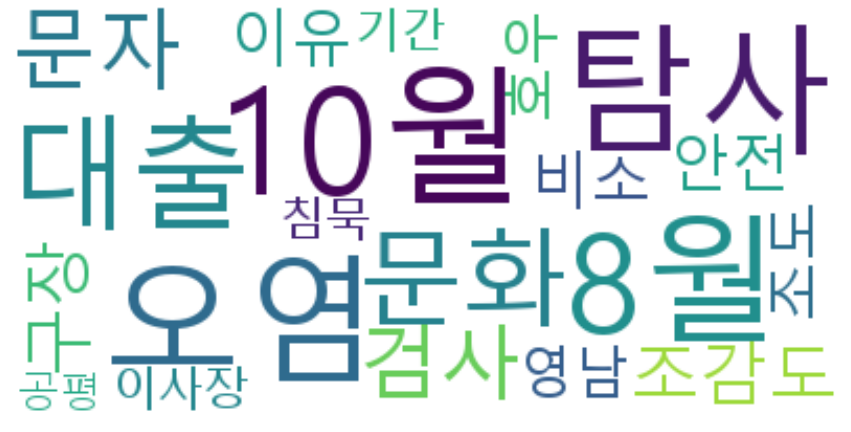

In [14]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')